In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
import json

def load_backtest_json(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    for key in ["long_entries", "short_entries", "exits"]:
        data[key] = [tuple(x) for x in data[key] if x is not None]

    return data

testing_set = pd.read_csv("testing_indicators5_log.csv")
ATR = testing_set["ATR%"]
data = pd.read_csv("testing_data.csv")
df = data.copy()
price_plt = df.iloc[::5, :].reset_index(drop=True)

In [148]:
LR_backtest  = load_backtest_json("LR_backtest.json")
SVR_backtest = load_backtest_json("SVR_backtest.json")
XGB_backtest = load_backtest_json("XGB_backtest.json")
DT_backtest  = load_backtest_json("DT_backtest.json")
RF_backtest  = load_backtest_json("RF_backtest.json")

In [149]:
LR_backtest_ridge = load_backtest_json("LR_backtest_ridge.json")
SVR_backtest_ridge = load_backtest_json("SVR_backtest_ridge.json")
XGB_backtest_ridge = load_backtest_json("XGB_backtest_ridge.json")
DT_backtest_ridge  = load_backtest_json("DT_backtest_ridge.json")
RF_backtest_ridge  = load_backtest_json("RF_backtest_ridge.json")

In [150]:
import yfinance as yf

ticker = "^TNX"
data = yf.download(ticker, period="1y")

risk_free_rate = data['Close'].iloc[-1] / 100
risk_free_rate = risk_free_rate["^TNX"]/121

/tmp/ipython-input-3789647642.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


In [151]:
def Sharp(total_ret):
    ret = np.mean(total_ret)
    vol = np.std(total_ret)

    N = len(total_ret)
    if N == 0 or vol == 0:
        return np.nan

    T_years = (len(data) * 5) / (60 * 24 * 365)

    # 年化
    ret_annual = (1 + ret)**(1/T_years) - 1
    vol_annual = vol * (1 / np.sqrt(T_years))

    return float((ret_annual - risk_free_rate) / vol_annual)

In [152]:
def MaxDrawdown(total_ret):
    if len(total_ret) == 0:
        return np.nan
    equity = np.cumprod(1 + np.array(total_ret))
    peak = np.maximum.accumulate(equity)
    drawdown = (peak - equity) / peak
    return drawdown.max()

In [153]:
def CAGR(total_ret):
    if len(total_ret) == 0:
        return np.nan

    equity = np.cumprod(1 + np.array(total_ret))

    T_years = (len(data) * 5) / (60 * 24 * 365)

    if T_years <= 0:
        return np.nan

    val = (equity[-1]) ** (1 / T_years) - 1
    return float(np.format_float_positional(val, precision=7, unique=False, fractional=True))

In [154]:
sharpe_LR = Sharp(LR_backtest["total_ret"])
sharpe_SVR = Sharp(SVR_backtest["total_ret"])
sharpe_XGB = Sharp(XGB_backtest["total_ret"])
sharpe_DT = Sharp(DT_backtest["total_ret"])
sharpe_RF = Sharp(RF_backtest["total_ret"])

In [155]:
sharpe_LR_ridge = Sharp(LR_backtest_ridge["total_ret"])
sharpe_SVR_ridge = Sharp(SVR_backtest_ridge["total_ret"])
sharpe_XGB_ridge = Sharp(XGB_backtest_ridge["total_ret"])
sharpe_DT_ridge = Sharp(DT_backtest_ridge["total_ret"])
sharpe_RF_ridge = Sharp(RF_backtest_ridge["total_ret"])

In [156]:
maxd_LR = MaxDrawdown(LR_backtest["total_ret"])
maxd_SVR = MaxDrawdown(SVR_backtest["total_ret"])
maxd_XGB = MaxDrawdown(XGB_backtest["total_ret"])
maxd_DT = MaxDrawdown(DT_backtest["total_ret"])
maxd_RF = MaxDrawdown(RF_backtest["total_ret"])

In [157]:
maxd_LR_ridge = MaxDrawdown(LR_backtest_ridge["total_ret"])
maxd_SVR_ridge = MaxDrawdown(SVR_backtest_ridge["total_ret"])
maxd_XGB_ridge = MaxDrawdown(XGB_backtest_ridge["total_ret"])
maxd_DT_ridge = MaxDrawdown(DT_backtest_ridge["total_ret"])
maxd_RF_ridge = MaxDrawdown(RF_backtest_ridge["total_ret"])

In [158]:
cagr_LR  = CAGR(LR_backtest["total_ret"])
cagr_SVR = CAGR(SVR_backtest["total_ret"])
cagr_XGB = CAGR(XGB_backtest["total_ret"])
cagr_DT  = CAGR(DT_backtest["total_ret"])
cagr_RF  = CAGR(RF_backtest["total_ret"])

In [159]:
cagr_LR_ridge = CAGR(LR_backtest_ridge["total_ret"])
cagr_SVR_ridge = CAGR(SVR_backtest_ridge["total_ret"])
cagr_XGB_ridge = CAGR(XGB_backtest_ridge["total_ret"])
cagr_DT_ridge  = CAGR(DT_backtest_ridge["total_ret"])
cagr_RF_ridge  = CAGR(RF_backtest_ridge["total_ret"])

In [160]:
def visualize(long_entries, short_entries, exits):
  plt.figure(figsize=(14,7))
  plt.plot(price_plt["close"], label="Price", color="blue")

  plt.scatter([x[0] for x in long_entries], [x[1] for x in long_entries],
              color="green", marker="^", s=80, label="Long Entry")

  plt.scatter([x[0] for x in short_entries], [x[1] for x in short_entries],
              color="red", marker="v", s=80, label="Short Entry")

  plt.scatter([x[0] for x in exits], [x[1] for x in exits],
              color="black", marker="x", s=80, label="Exit")

  plt.legend()
  plt.title("Trading Strategy Simulation")
  plt.xlabel("Index")
  plt.ylabel("Price")
  plt.show()

Plotting LR trading strategy


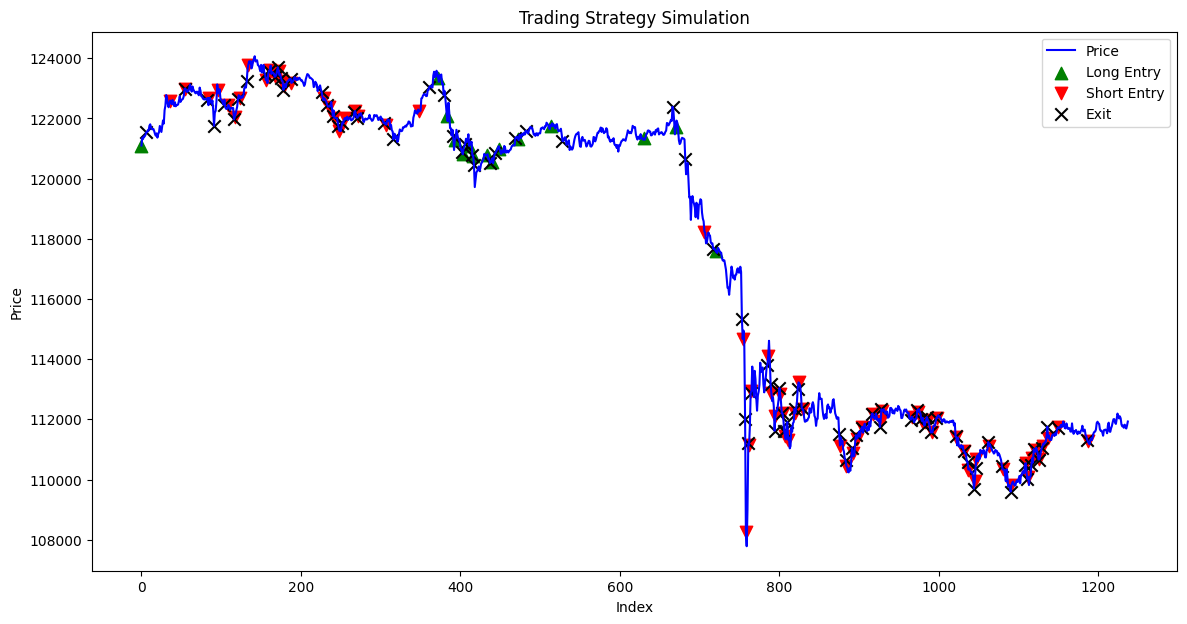

Sharpe ratio:  -0.8399537070702341
Max Drawdown:  0.06197069932081422
Plotting SVR trading strategy


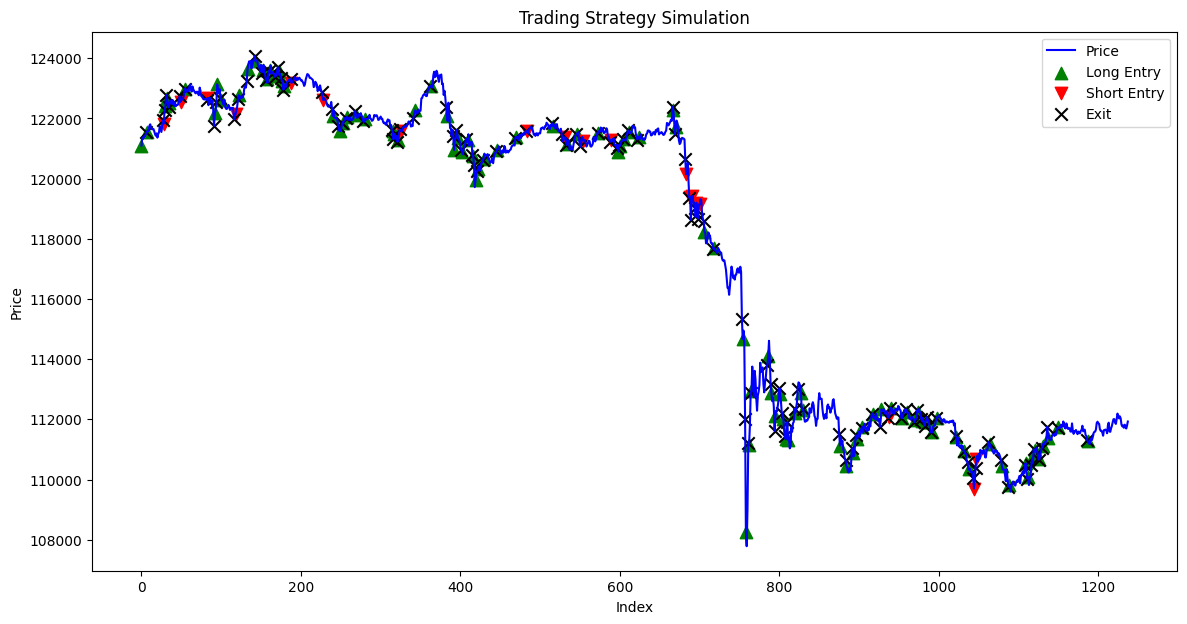

Sharpe ratio:  -0.3761932276619562
Max Drawdown:  0.04764429242983867
Plotting XGB trading strategy


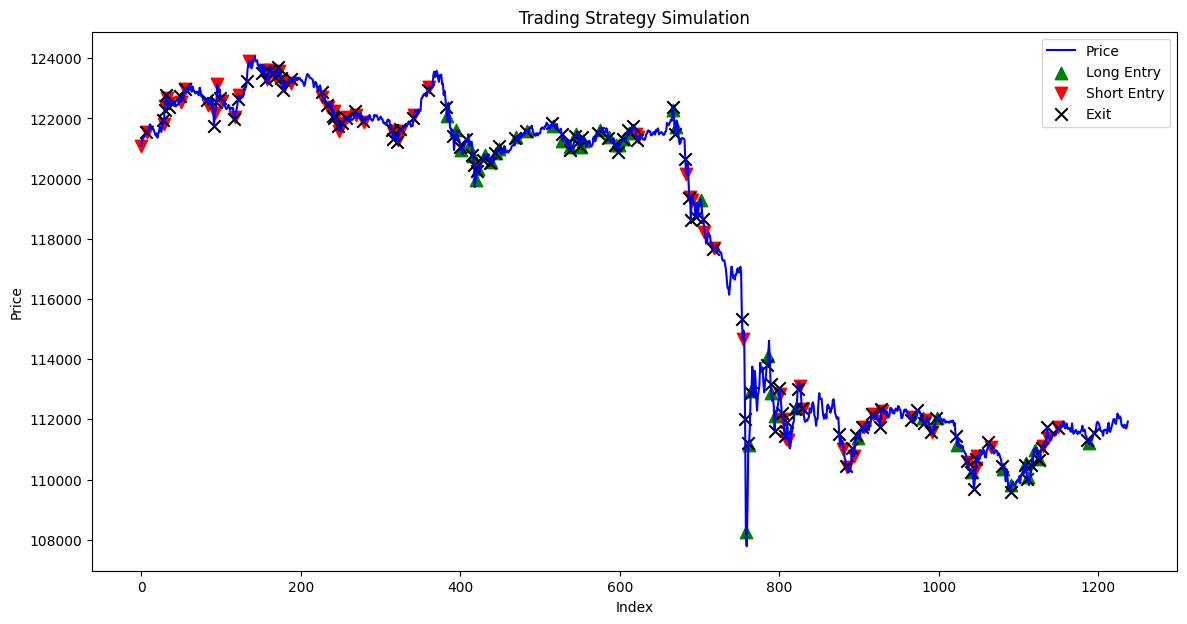

Sharpe ratio:  2.4221487287257126
Max Drawdown:  0.037379449580204636
Plotting DT trading strategy


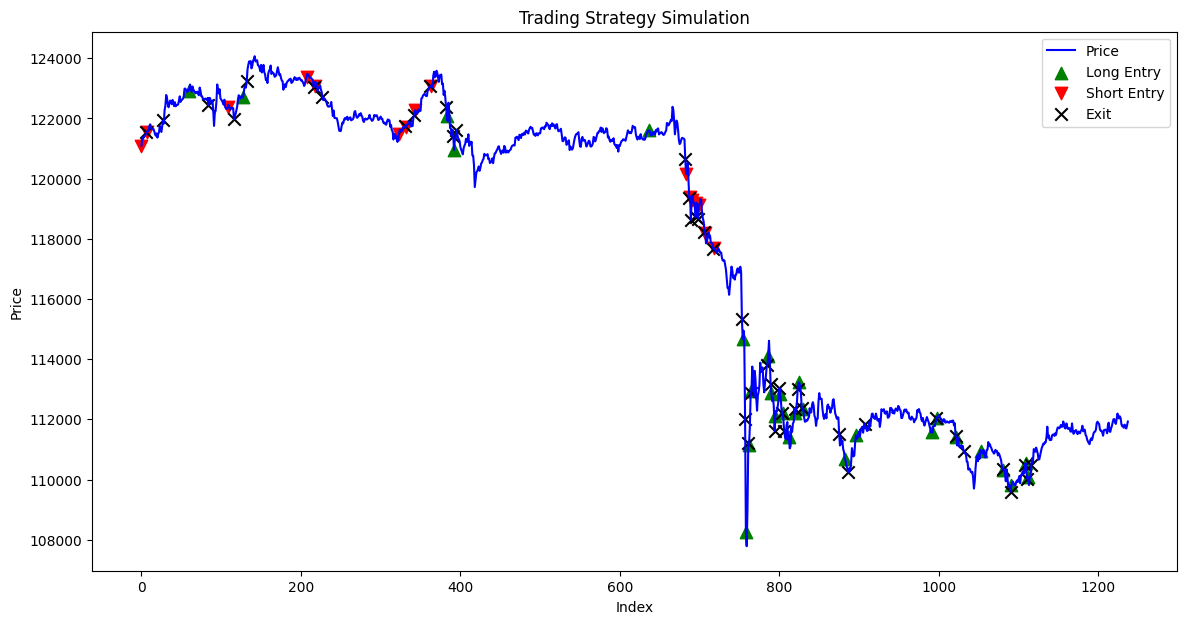

Sharpe ratio:  2.321043882892859
Max Drawdown:  0.03835753781572056
Plotting RF trading strategy


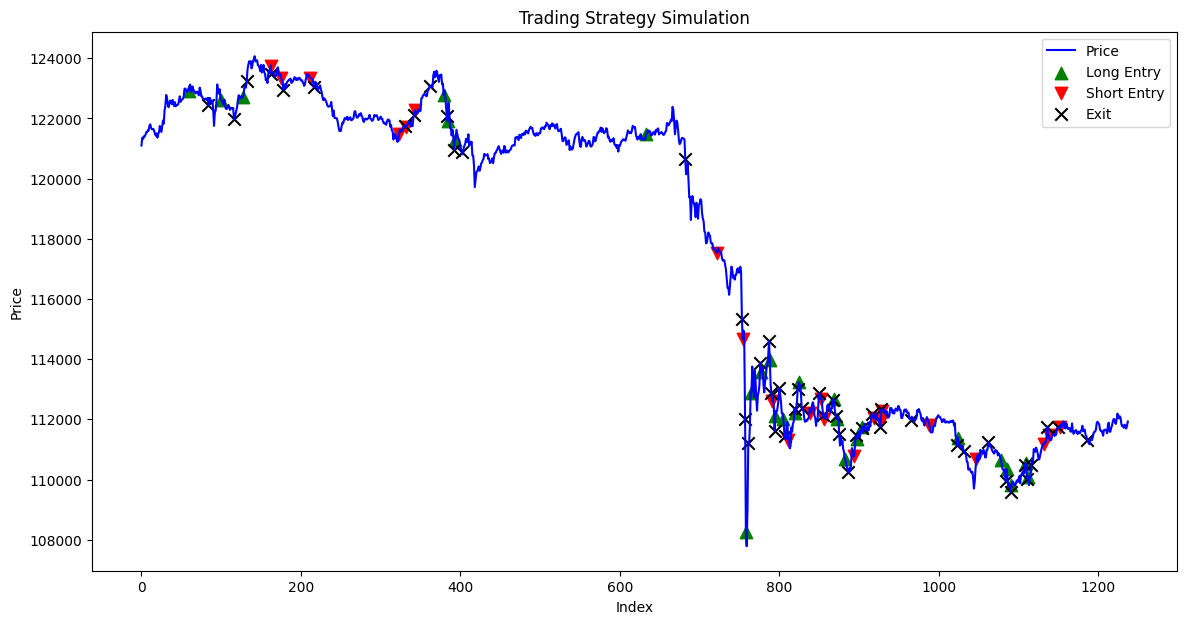

Sharpe ratio:  0.7945923142494654
Max Drawdown:  0.050184606693760986


In [161]:
backtests = {
    "LR": [LR_backtest, sharpe_LR, maxd_LR],
    "SVR": [SVR_backtest, sharpe_SVR, maxd_SVR],
    "XGB": [XGB_backtest, sharpe_XGB, maxd_XGB],
    "DT": [DT_backtest, sharpe_DT, maxd_DT],
    "RF": [RF_backtest, sharpe_RF, maxd_RF],
}

for name, bt in backtests.items():
    long_entries  = bt[0]["long_entries"]
    short_entries = bt[0]["short_entries"]
    exits = bt[0]["exits"]
    print(f"Plotting {name} trading strategy")
    visualize(long_entries, short_entries, exits)
    print("Sharpe ratio: ", bt[1])
    print("Max Drawdown: ", bt[2])

Plotting LR_ridge trading strategy


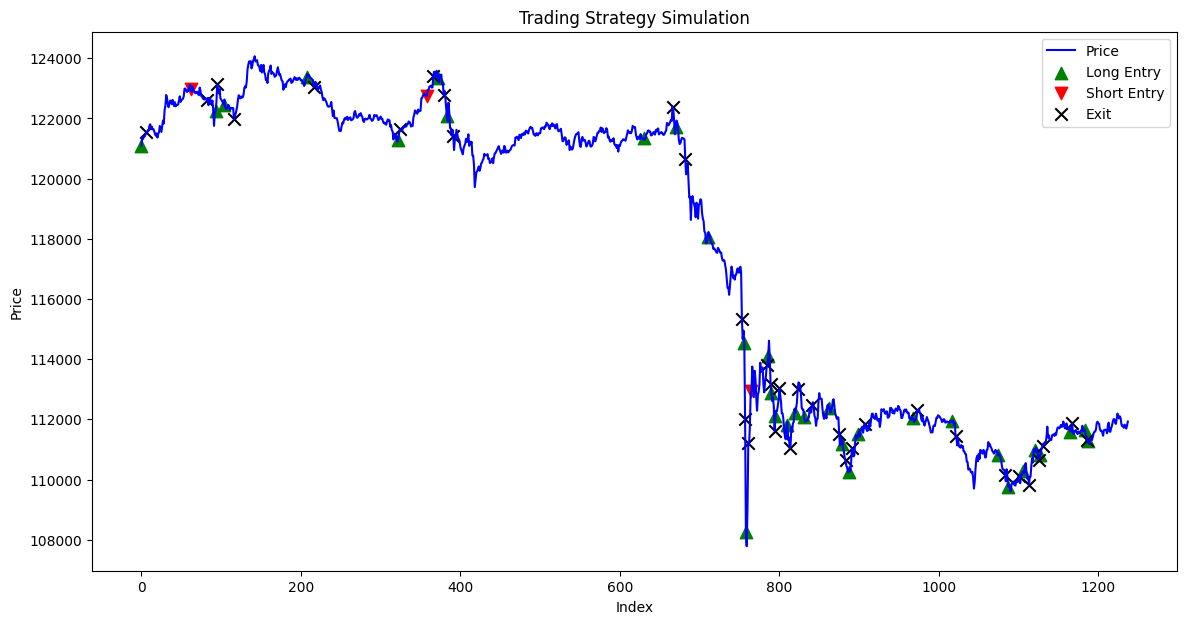

Sharpe ratio:  -2.52612821706313
Max Drawdown:  0.06520478800329911
Plotting SVR_ridge trading strategy


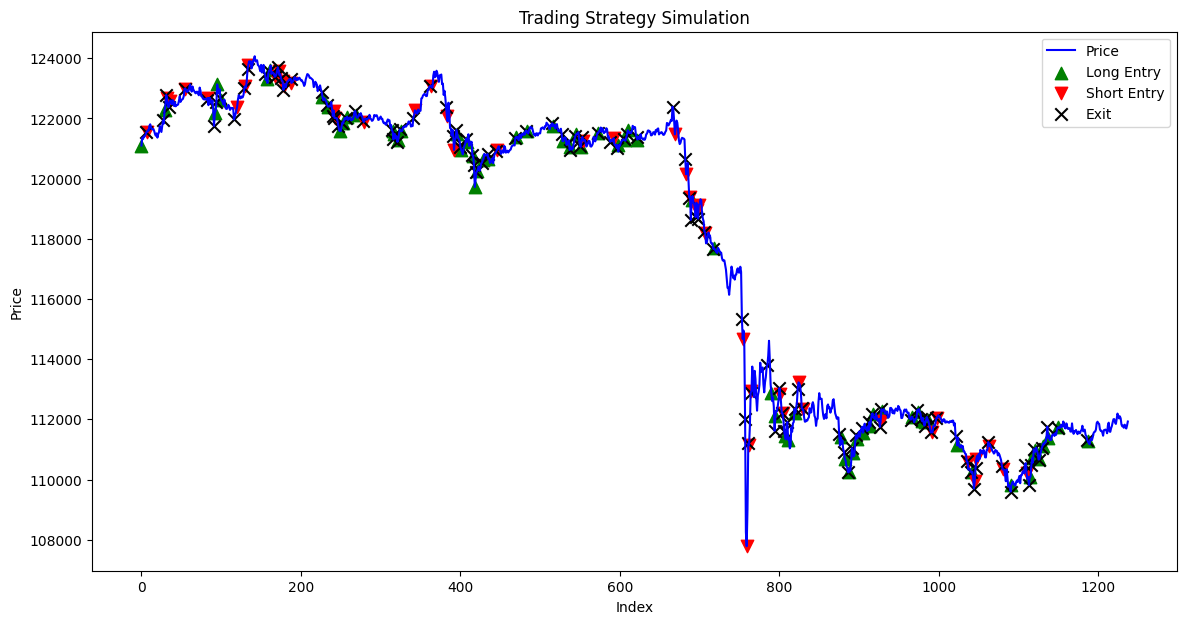

Sharpe ratio:  2.0176146349969493
Max Drawdown:  0.0645184236066539
Plotting XGB_ridge trading strategy


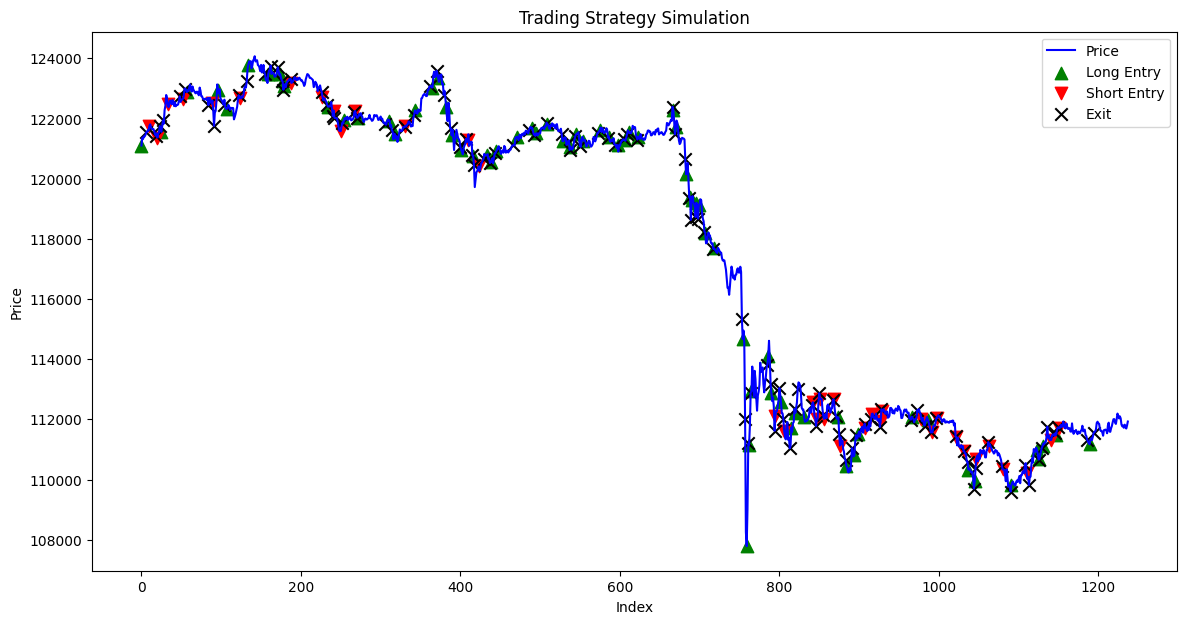

Sharpe ratio:  0.3434778870110076
Max Drawdown:  0.09371822017613705
Plotting DT_ridge trading strategy


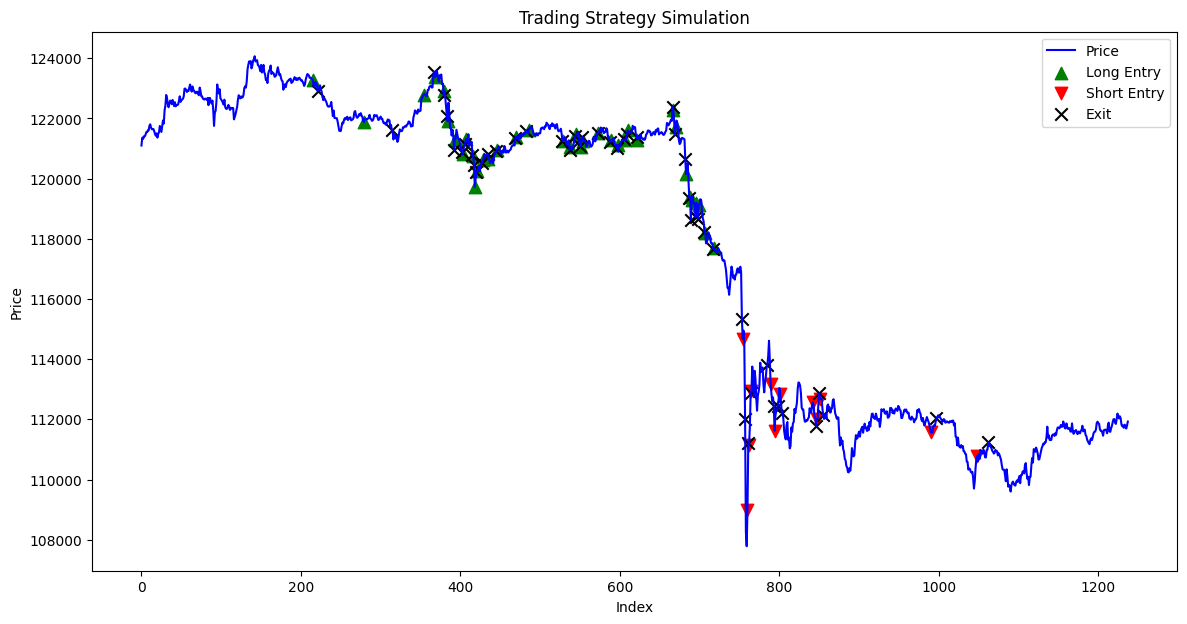

Sharpe ratio:  -3.832247014475909
Max Drawdown:  0.09430772112475666
Plotting RF_ridge trading strategy


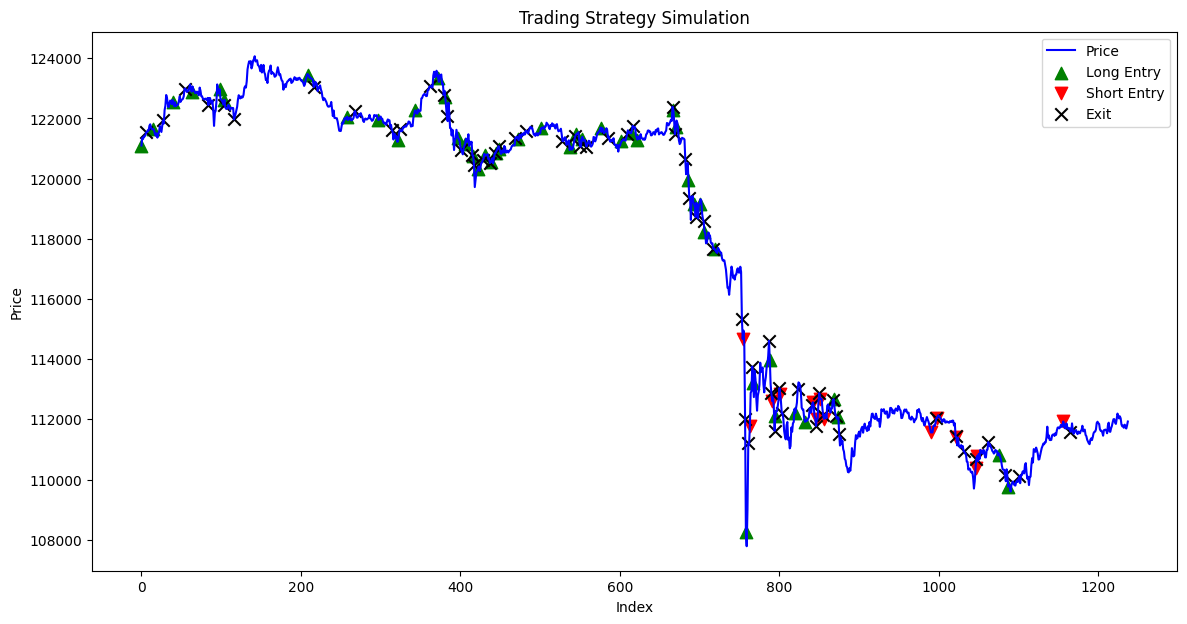

Sharpe ratio:  0.014803043646303615
Max Drawdown:  0.06489266595464438


In [162]:
backtests_ridge = {
    "LR_ridge": [LR_backtest_ridge, sharpe_LR_ridge, maxd_LR_ridge],
    "SVR_ridge": [SVR_backtest_ridge, sharpe_SVR_ridge, maxd_SVR_ridge],
    "XGB_ridge": [XGB_backtest_ridge, sharpe_XGB_ridge, maxd_XGB_ridge],
    "DT_ridge": [DT_backtest_ridge, sharpe_DT_ridge, maxd_DT_ridge],
    "RF_ridge": [RF_backtest_ridge, sharpe_RF_ridge, maxd_RF_ridge],
}

for name, bt in backtests_ridge.items():
    long_entries  = bt[0]["long_entries"]
    short_entries = bt[0]["short_entries"]
    exits = bt[0]["exits"]
    print(f"Plotting {name} trading strategy")
    visualize(long_entries, short_entries, exits)
    print("Sharpe ratio: ", bt[1])
    print("Max Drawdown: ", bt[2])

In [163]:
# 勝率 = 賺錢的交易數量 / (賺錢的交易數量 + 虧錢的交易數量)
def trade_winrate(total_ret):
    wins = sum(r > 0 for r in total_ret)
    loss = sum(r < 0 for r in total_ret)
    if wins + loss == 0:
        return np.nan
    return wins / (wins + loss)

In [164]:
winrates = {
    "LR": trade_winrate(LR_backtest["total_ret"]),
    "SVR": trade_winrate(SVR_backtest["total_ret"]),
    "XGB": trade_winrate(XGB_backtest["total_ret"]),
    "DT": trade_winrate(DT_backtest["total_ret"]),
    "RF": trade_winrate(RF_backtest["total_ret"]),
}

winrates

{'LR': 0.5176470588235295,
 'SVR': 0.4915254237288136,
 'XGB': 0.5344827586206896,
 'DT': 0.5227272727272727,
 'RF': 0.4375}

In [165]:
winrates = {
    "LR_ridge": trade_winrate(LR_backtest_ridge["total_ret"]),
    "SVR_ridge": trade_winrate(SVR_backtest_ridge["total_ret"]),
    "XGB_ridge": trade_winrate(XGB_backtest_ridge["total_ret"]),
    "DT_ridge": trade_winrate(DT_backtest_ridge["total_ret"]),
    "RF_ridge": trade_winrate(RF_backtest_ridge["total_ret"]),
}

winrates

{'LR_ridge': 0.4411764705882353,
 'SVR_ridge': 0.5877192982456141,
 'XGB_ridge': 0.5272727272727272,
 'DT_ridge': 0.3877551020408163,
 'RF_ridge': 0.47540983606557374}

In [166]:
# Expected values, ev = p(win)*u(win)+p(loss)*u(loss)
def trade_ev(total_ret):
    total_ret = np.array(total_ret)
    wins = total_ret[total_ret > 0]
    loss = total_ret[total_ret < 0]

    if len(wins) + len(loss) == 0:
        return np.nan, np.nan, np.nan, np.nan, np.nan

    p_win = len(wins) / (len(wins) + len(loss))
    p_loss = 1 - p_win

    avg_win = wins.mean() if len(wins) > 0 else 0.0
    avg_loss = -loss.mean() if len(loss) > 0 else 0.0

    EV = p_win * avg_win - p_loss * avg_loss

    return EV, p_win, avg_win, p_loss, avg_loss

In [167]:
ev_stats = {}

for name, bt in {
    "LR": LR_backtest,
    "SVR": SVR_backtest,
    "XGB": XGB_backtest,
    "DT": DT_backtest,
    "RF": RF_backtest,
    "LR_ridge": LR_backtest_ridge,
    "SVR_ridge": SVR_backtest_ridge,
    "XGB_ridge": XGB_backtest_ridge,
    "DT_ridge": DT_backtest_ridge,
    "RF_ridge": RF_backtest_ridge,
}.items():
    EV, p_win, avg_win, p_loss, avg_loss = trade_ev(bt["total_ret"])
    ev_stats[name] = {
        "EV_per_trade": EV,
        "win_rate": p_win,
        "avg_win": avg_win,
        "loss_rate": p_loss,
        "avg_loss": avg_loss,
    }

ev_df = pd.DataFrame(ev_stats).T
print(ev_df)

           EV_per_trade  win_rate   avg_win  loss_rate  avg_loss
LR            -0.000285  0.517647  0.004551   0.482353  0.005474
SVR           -0.000109  0.491525  0.004435   0.508475  0.004503
XGB            0.000608  0.534483  0.004724   0.465517  0.004119
DT             0.000816  0.522727  0.007404   0.477273  0.006398
RF             0.000292  0.437500  0.007604   0.562500  0.005395
LR_ridge      -0.001475  0.441176  0.006192   0.558824  0.007529
SVR_ridge      0.000537  0.587719  0.004319   0.412281  0.004854
XGB_ridge      0.000103  0.527273  0.004498   0.472727  0.004800
DT_ridge      -0.001956  0.387755  0.004814   0.612245  0.006244
RF_ridge       0.000006  0.475410  0.005996   0.524590  0.005422


In [168]:
performance_table = pd.DataFrame({
    "Model": ["LR", "SVR", "XGB", "DT", "RF", "LR_ridge", "SVR_ridge", "XGB_ridge", "DT_ridge", "RF_ridge"],
    "Sharpe Ratio": [sharpe_LR, sharpe_SVR, sharpe_XGB, sharpe_DT, sharpe_RF,
              sharpe_LR_ridge, sharpe_SVR_ridge, sharpe_XGB_ridge, sharpe_DT_ridge, sharpe_RF_ridge],
    "Max Drawdown": [maxd_LR, maxd_SVR, maxd_XGB, maxd_DT, maxd_RF,
              maxd_LR_ridge, maxd_SVR_ridge, maxd_XGB_ridge, maxd_DT_ridge, maxd_RF_ridge],
    "CAGR": [cagr_LR, cagr_SVR, cagr_XGB, cagr_DT, cagr_RF,
             cagr_LR_ridge, cagr_SVR_ridge, cagr_XGB_ridge, cagr_DT_ridge, cagr_RF_ridge]
})

print(performance_table)

       Model  Sharpe Ratio  Max Drawdown          CAGR
0         LR     -0.839954      0.061971 -9.999817e-01
1        SVR     -0.376193      0.047644 -9.980736e-01
2        XGB      2.422149      0.037379  2.865176e+12
3         DT      2.321044      0.038358  1.730686e+06
4         RF      0.794592      0.050185  1.871041e+02
5   LR_ridge     -2.526128      0.065205 -1.000000e+00
6  SVR_ridge      2.017615      0.064518  5.508954e+10
7  XGB_ridge      0.343478      0.093718  4.616423e+01
8   DT_ridge     -3.832247      0.094308 -1.000000e+00
9   RF_ridge      0.014803      0.064893 -4.293534e-01
